## 1. Problem Definition and Dataset Identification

### Problem Definition:

Finding a home is like navigating a jungle of open houses, bidding wars, and endless decisions. It's a wild ride! Enter our trusty machine learning model, here to tame the beast of predicting house prices in Ames City, Iowa. By analyzing key features like location, size, and the number of bedrooms, our model can cut through the chaos and provide accurate predictions based on historical data. This isn’t just a fancy tech trick; it’s a game-changer for home buyers in Ames City. With predicted prices at their fingertips, buyers can make informed decisions, avoid overpaying, and ultimately find their dream home without losing their sanity.

### Why Machine Learning?

Machine learning is the ideal choice for predicting house prices because it excels at handling a large number of features and capturing non-linear relationships. Unlike traditional statistical methods, which can struggle with the complex interactions between variables, machine learning models can learn from these intricate patterns. Additionally, they improve over time as more data becomes available, making them increasingly accurate and reliable.

### Dataset Identification:

For this project, we'll use the well-known "House Prices: Advanced Regression Techniques" dataset from Kaggle. The dataset information is gathered from Ames City, Iowa. You can download it from the following location: Kaggle House Prices Dataset.
https://www.kaggle.com/datasets/lespin/house-prices-dataset/data

## 2. Data Exploration, Cleaning, Feature Engineering, and Selection

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle


### Load the dataset

In [288]:
# Load the dataset
test_df = pd.read_csv('C:/Users/16192/OneDrive/Documents/GitHub/ANA680Final/Data/test.csv')
print(data.shape)
print(data.head(10))

(1459, 271)
     Id    SalePrice  MSSubClass  LotFrontage  LotArea  OverallQual  \
0  1461  169277.0525          20         80.0    11622            5   
1  1462  187758.3940          20         81.0    14267            6   
2  1463  183583.6836          60         74.0    13830            5   
3  1464  179317.4775          60         78.0     9978            6   
4  1465  150730.0800         120         43.0     5005            8   
5  1466  177150.9892          60         75.0    10000            6   
6  1467  172070.6592          20         67.0     7980            6   
7  1468  175110.9565          60         63.0     8402            6   
8  1469  162011.6988          20         85.0    10176            7   
9  1470  160726.2478          20         70.0     8400            4   

   OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ...  SaleType_ConLw  \
0            6       1961          1961         0.0  ...           False   
1            6       1958          1958       108.0  .

In [289]:
print(data.info())
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 271 entries, Id to SaleCondition_Partial
dtypes: bool(233), float64(12), int64(26)
memory usage: 765.2 KB
None
                Id      SalePrice   MSSubClass  LotFrontage       LotArea  \
count  1459.000000    1459.000000  1459.000000  1459.000000   1459.000000   
mean   2190.000000  179183.918243    57.378341    68.334476   9819.161069   
std     421.321334   16518.303051    42.746880    20.569211   4955.517327   
min    1461.000000  135751.318900    20.000000    21.000000   1470.000000   
25%    1825.500000  168703.011200    20.000000    60.000000   7391.000000   
50%    2190.000000  179208.665700    50.000000    67.000000   9399.000000   
75%    2554.500000  186789.409400    70.000000    78.000000  11517.500000   
max    2919.000000  281643.976100   190.000000   200.000000  56600.000000   

       OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea  ...  \
count  1459.000000  1459.000000 

### Data Cleaning

In [290]:
# Fill numerical columns with the median value
num_cols = data.select_dtypes(include=[np.number]).columns
data[num_cols] = data[num_cols].apply(lambda x: x.fillna(x.median()), axis=0)

# Fill categorical columns with the most frequent value
cat_cols = data.select_dtypes(include=[object]).columns
data[cat_cols] = data[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]), axis=0)

# Encode categorical variables
data = pd.get_dummies(data)

print(data.head(10))

     Id    SalePrice  MSSubClass  LotFrontage  LotArea  OverallQual  \
0  1461  169277.0525          20         80.0    11622            5   
1  1462  187758.3940          20         81.0    14267            6   
2  1463  183583.6836          60         74.0    13830            5   
3  1464  179317.4775          60         78.0     9978            6   
4  1465  150730.0800         120         43.0     5005            8   
5  1466  177150.9892          60         75.0    10000            6   
6  1467  172070.6592          20         67.0     7980            6   
7  1468  175110.9565          60         63.0     8402            6   
8  1469  162011.6988          20         85.0    10176            7   
9  1470  160726.2478          20         70.0     8400            4   

   OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ...  SaleType_ConLw  \
0            6       1961          1961         0.0  ...           False   
1            6       1958          1958       108.0  ...          

In [291]:
# Fill missing values
num_cols = filtered_data.select_dtypes(include=[np.number]).columns
cat_cols = filtered_data.select_dtypes(include=[object]).columns

filtered_data[num_cols] = filtered_data[num_cols].apply(lambda x: x.fillna(x.median()), axis=0)
filtered_data[cat_cols] = filtered_data[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]), axis=0)


In [292]:
# Select the relevant features and target variable
features = ['Neighborhood', 'LotArea', 'YearBuilt', 'BldgType', 'CentralAir', 'GarageCars', 'TotRmsAbvGrd', 'FullBath', 'HalfBath']
target = 'SalePrice'

X = train_data[features]
y = train_data[target]


In [293]:
# Preprocess categorical features
categorical_features = ['Neighborhood', 'BldgType', 'CentralAir']
numerical_features = ['LotArea', 'YearBuilt', 'GarageCars', 'TotRmsAbvGrd', 'FullBath', 'HalfBath']

In [294]:
# Create preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [295]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [296]:
# Create the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [297]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [298]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea', 'YearBuilt',
                                                   'GarageCars', 'TotRmsAbvGrd',
                                                   'FullBath', 'HalfBath']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Neighborhood', 'BldgType',
                                                   'CentralAir'])])),
                ('regressor', LinearRegression())])

In [299]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [300]:
# Calculate residuals
residuals = y_test - y_pred

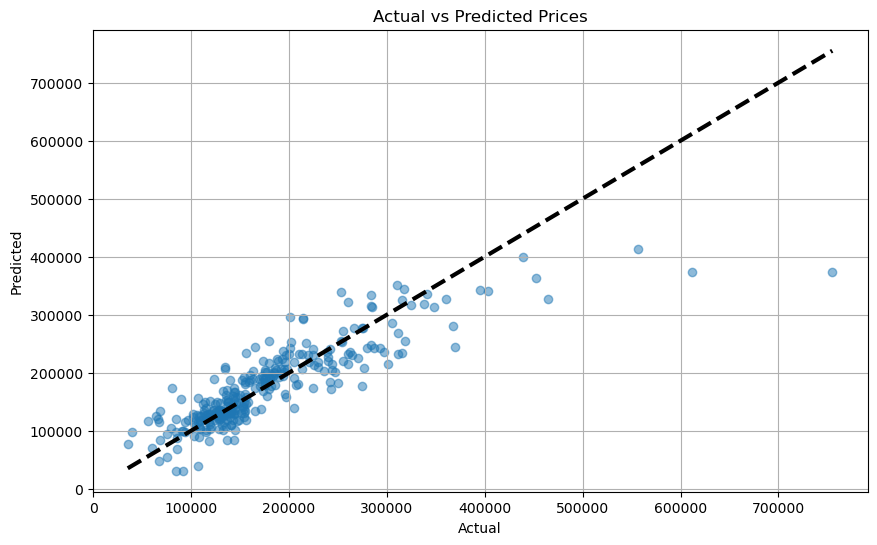

In [301]:
# Scatter Plot of Actual vs. Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.savefig('actual_vs_predicted.png')  # Save the figure
plt.show()

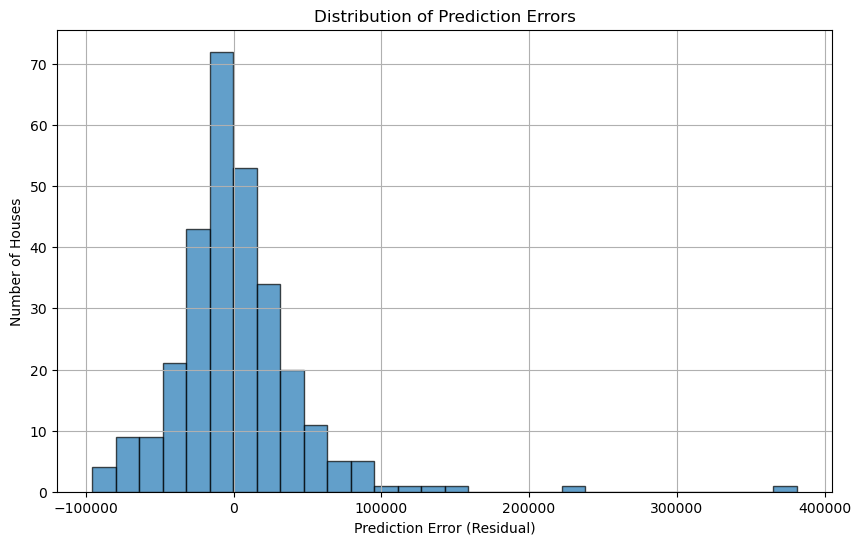

In [302]:
# Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Prediction Error (Residual)')
plt.ylabel('Number of Houses')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.savefig('histogram_of_residuals.png') 
plt.show()

In [303]:
# Print the first few predictions and actual values
for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f"Actual: {actual}, Predicted: {predicted}")

Actual: 154500, Predicted: 124356.39339900459
Actual: 325000, Predicted: 316880.6039849393
Actual: 115000, Predicted: 127705.6917231681
Actual: 159000, Predicted: 184444.14660551478
Actual: 315500, Predicted: 234879.64431602217
Actual: 75500, Predicted: 54234.0015035824
Actual: 311500, Predicted: 232136.70834402624
Actual: 146000, Predicted: 145579.83260021408
Actual: 84500, Predicted: 31501.714453659355
Actual: 135500, Predicted: 160928.00879646392


In [304]:
print(X_train.head())
print(X_test.head())

     Neighborhood  LotArea  YearBuilt BldgType CentralAir  GarageCars  \
254         NAmes     8400       1957     1Fam          Y           1   
1066      Gilbert     7837       1993     1Fam          Y           2   
638       Edwards     8777       1910     1Fam          Y           0   
799         SWISU     7200       1937     1Fam          Y           1   
380         SWISU     5000       1924     1Fam          Y           1   

      TotRmsAbvGrd  FullBath  HalfBath  
254              5         1         0  
1066             7         2         1  
638              4         1         0  
799              7         1         1  
380              6         2         0  
     Neighborhood  LotArea  YearBuilt BldgType CentralAir  GarageCars  \
892        Sawyer     8414       1963     1Fam          Y           1   
1105      NoRidge    12256       1994     1Fam          Y           2   
413       OldTown     8960       1927     1Fam          Y           2   
522       BrkSide     5

In [305]:
# Save the model to a file
model_path = 'house_price_model.pkl'
with open(model_path, 'wb') as model_file:
    pickle.dump(model, model_file)
